# Analytical and Numerical Derivative Comparison

## Choose a Function and Calculate its Analytical Derivative

we use the function:
$$f(x) = \sin(x) + 0.5x^3$$

analytical derivative:

$$ = \frac{d}{dx}[\sin(x)] + \frac{d}{dx}[0.5x^3]$$

$$f'(x) = \cos(x) + 1.5x^2$$

**Therefore:** $f'(x) = \cos(x) + 1.5x^2$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Define the original function and its analytical derivative
def f(x):
    """Original function: f(x) = sin(x) + 0.5x³"""
    return np.sin(x) + 0.5*x**3

def f_prime_analytical(x):
    """Analytical derivative: f'(x) = cos(x) + 1.5x²"""
    return np.cos(x) + 1.5*x**2

# Display the functions
print("Original function: f(x) = sin(x) + 0.5x³")
print("Analytical derivative: f'(x) = cos(x) + 1.5x²")

Original function: f(x) = sin(x) + 0.5x³
Analytical derivative: f'(x) = cos(x) + 1.5x²


## Generate Data for the Analytical Derivative and Plot It


In [27]:
# Generate data points
x_min, x_max = -2, 2
n_points = 200

x = np.linspace(x_min, x_max, n_points)
y_original = f(x)
y_prime_analytical = f_prime_analytical(x)

print(f"Generated {n_points} data points")
print(f"x range: [{x_min}, {x_max}]")
print(f"Original function values range: [{np.min(y_original):.2f}, {np.max(y_original):.2f}]")
print(f"Derivative values range: [{np.min(y_prime_analytical):.2f}, {np.max(y_prime_analytical):.2f}]")

Generated 200 data points
x range: [-2, 2]
Original function values range: [-4.91, 4.91]
Derivative values range: [1.00, 5.58]


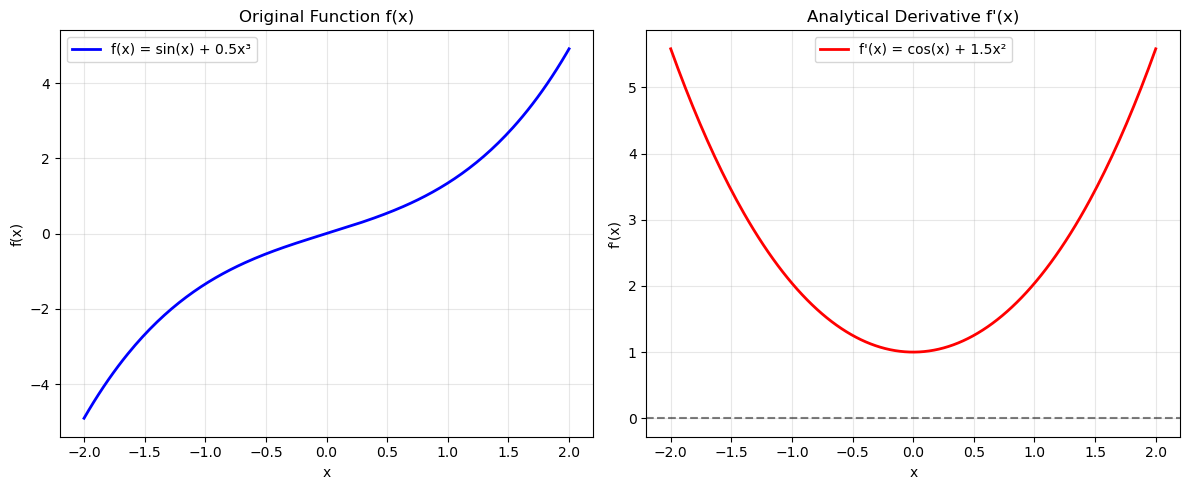

In [28]:
# Plot the original function and its analytical derivative
plt.figure(figsize=(12, 5))

# Plot 1: Original function
plt.subplot(1, 2, 1)
plt.plot(x, y_original, 'blue', linewidth=2, label='f(x) = sin(x) + 0.5x³')
plt.title('Original Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Analytical derivative
plt.subplot(1, 2, 2)
plt.plot(x, y_prime_analytical, 'red', linewidth=2, label="f'(x) = cos(x) + 1.5x²")
plt.title('Analytical Derivative f\'(x)')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [29]:
# Analyze key properties of the derivative
print("Analysis of the Analytical Derivative f'(x) = cos(x) + 1.5x²")
print("=" * 60)

# Test some specific points
test_points = [-2, -1, 0, 1, 2]
print(f"Derivative values at test points:")
for x_val in test_points:
    cos_part = np.cos(x_val)
    quad_part = 1.5 * x_val**2
    total = f_prime_analytical(x_val)
    print(f"f'({x_val:2d}) = cos({x_val:2d}) + 1.5×({x_val})² = {cos_part:6.3f} + {quad_part:6.3f} = {total:6.3f}")

print(f"\nFunction behavior:")
print(f"• cos(x) component: oscillates between -1 and +1")
print(f"• 1.5x² component: always positive, grows rapidly")
print(f"• Combined: oscillatory behavior with quadratic growth")

Analysis of the Analytical Derivative f'(x) = cos(x) + 1.5x²
Derivative values at test points:
f'(-2) = cos(-2) + 1.5×(-2)² = -0.416 +  6.000 =  5.584
f'(-1) = cos(-1) + 1.5×(-1)² =  0.540 +  1.500 =  2.040
f'( 0) = cos( 0) + 1.5×(0)² =  1.000 +  0.000 =  1.000
f'( 1) = cos( 1) + 1.5×(1)² =  0.540 +  1.500 =  2.040
f'( 2) = cos( 2) + 1.5×(2)² = -0.416 +  6.000 =  5.584

Function behavior:
• cos(x) component: oscillates between -1 and +1
• 1.5x² component: always positive, grows rapidly
• Combined: oscillatory behavior with quadratic growth


## Numerical Derivative Using Taylor Expansion

For our function $f(x) = \sin(x) + 0.5x^3$:

$$f(x+h) = f(x) + f'(x)h + \frac{f''(x)h^2}{2!} + O(h^3)$$

Where:
- $f'(x) = \cos(x) + 1.5x^2$
- $f''(x) = -\sin(x) + 3x$
First-order approximation:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$
Theoretical error: $\text{Error} \approx \frac{f''(x) \cdot h}{2} = \frac{(-\sin(x) + 3x) \cdot h}{2}$

In [30]:
def f_prime_numerical(x, h):
    (f(x + h) - f(x)) / h

def f_double_prime(x):
    return -np.sin(x) + 3*x


print(" f'(x) ≈ [f(x+h) - f(x)]/h")
print("Second derivative: f''(x) = -sin(x) + 3x")

 f'(x) ≈ [f(x+h) - f(x)]/h
Second derivative: f''(x) = -sin(x) + 3x


## Part 4: Compare with Different Step Sizes

The more complex function will show clearer differences:
- h = 0.1: Large errors, especially where |f''(x)| is large
- h = 0.01: Moderate errors
- h = 0.001: Small errors, close to analytical

ValueError: x, y, and format string must not be None

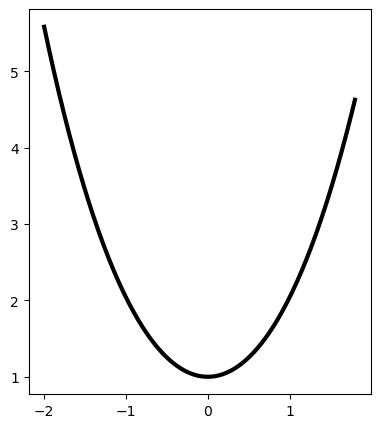

In [ ]:
step_sizes = [0.1, 0.01, 0.001]
colors = ['red', 'blue', 'green']

plt.figure(figsize=(15, 5))

for i, h in enumerate(step_sizes):
    plt.subplot(1, 3, i+1)
    
 
    x_plot = x[:-10] 
    y_analytical_plot = f_prime_analytical(x_plot)
    y_numerical_plot = f_prime_numerical(x_plot, h)
    
    plt.plot(x_plot, y_analytical_plot, 'black', linewidth=3, label='Analytical')
    
    plt.title(f'h = {h}')
    plt.xlabel('x')
    plt.ylabel("f'(x)")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print numerical results
print("Comparison Results:")
for h in step_sizes:
    x_test = 1.0  # Test at a specific point
    analytical = f_prime_analytical(x_test)
    numerical = f_prime_numerical(x_test, h)
   